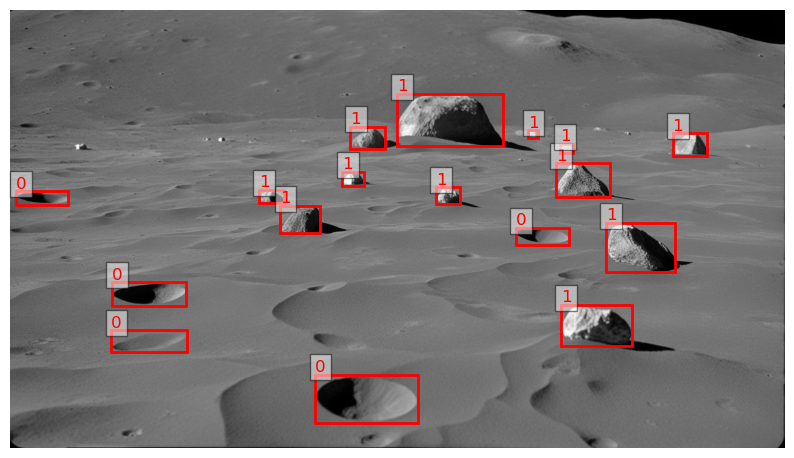

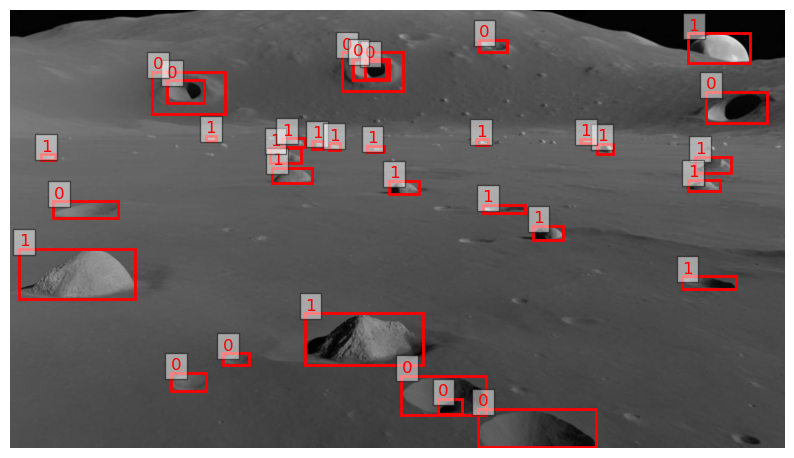

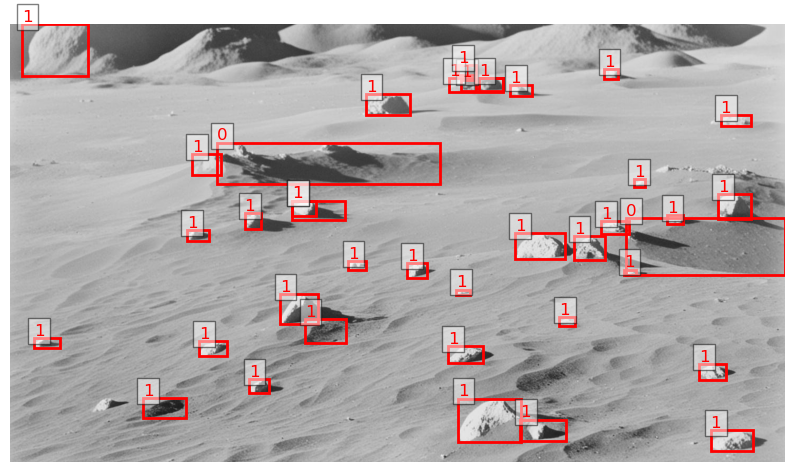

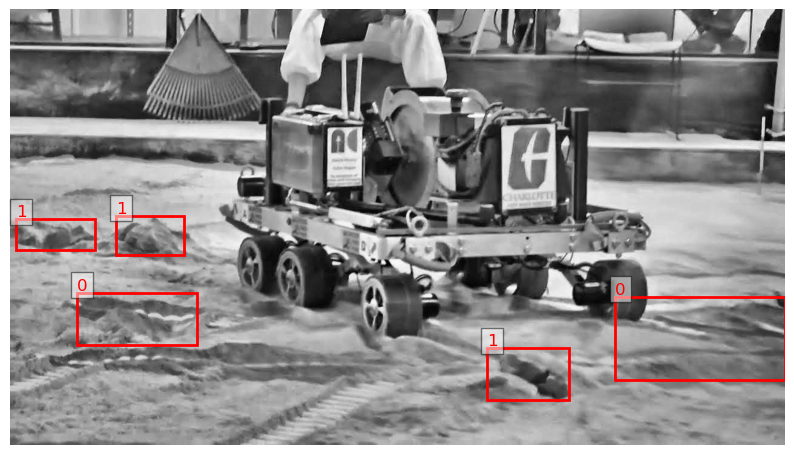

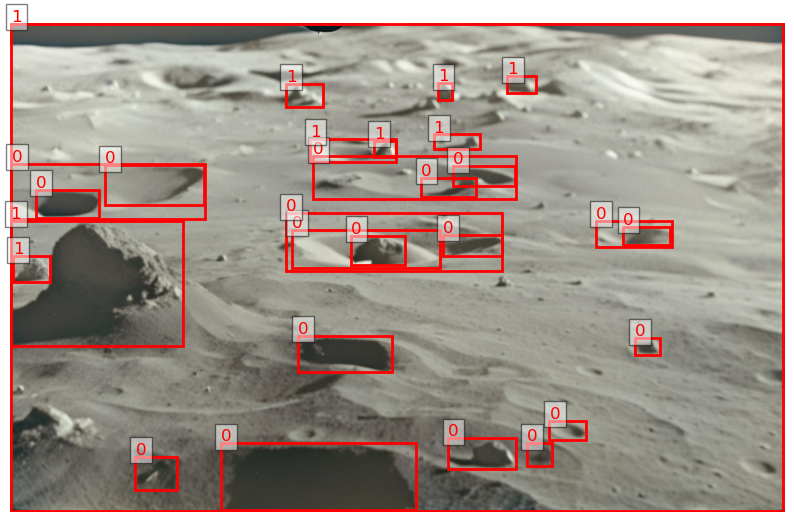

In [5]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import cv2

''' ---------------------------------------------------
 TestClassification.ipynb
    to validate that:
    ROCKS : 1
    HOLES : 0 
------------------------------------------------------- '''

# Base directory
base_dir = "JordanRoboflow"

def plot_image_with_bboxes(image_path, label_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read the labels
    with open(label_path, "r") as f:
        labels = f.readlines()

    # Plot the image
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image)

    # Get image dimensions
    height, width, _ = image.shape

    # Draw bounding boxes
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.split())
        x_min = int((x_center - box_width / 2) * width)
        y_min = int((y_center - box_height / 2) * height)
        x_max = int((x_center + box_width / 2) * width)
        y_max = int((y_center + box_height / 2) * height)

        # Draw the rectangle
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', facecolor='none', lw=2)
        ax.add_patch(rect)

        # Add class label
        ax.text(x_min, y_min - 5, str(int(class_id)), color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')
    plt.show()

# Iterate through the subdirectories
for subdir in os.listdir(base_dir):
    test_dir = os.path.join(base_dir, subdir, "test")
    if not os.path.exists(test_dir):
        continue

    image_dir = os.path.join(test_dir, "images")
    label_dir = os.path.join(test_dir, "labels")

    if os.path.exists(image_dir) and os.path.exists(label_dir):
        # Get the first image and corresponding label
        image_files = sorted(os.listdir(image_dir))
        label_files = sorted(os.listdir(label_dir))

        if image_files and label_files:
            image_path = os.path.join(image_dir, image_files[-2])
            label_path = os.path.join(label_dir, label_files[-2])

            plot_image_with_bboxes(image_path, label_path)